<img src="../../img/species_reduction.png" alt="Species Reduction" style="width: 100%; border-radius: 20px;"/>

## Objective
To limit the amount of data for the outlier analysis, the number of bird species is initially limited to 27 species. The selection was made jointly by the ornithologists from Germany and Switzerland. They chose bird species from which they expect particularly interesting results.<br>

## Scope
In this notebook, we filter the selected species from the master dataset that contains all sightings from 2018-2022 of Germany and Switzerland (merged in *00_Dataset_Merging.ipynb*) and save the resulting dataset in a new csv file.<br>

## Output data
The resulting filtered dataset can be found [here](https://drive.google.com/drive/folders/18XoTsDtWnN4QdIBNGGbq-jaa6U3nVb2e) as *master_bird_data_selected_species.csv*.

In [3]:
import pandas as pd
import plotly.express as px

# 
<p style="background-color:#4A3228;color:white;font-size:240%;border-radius:10px 10px 10px 10px;"> &nbsp; 0️⃣ Specify your paths </p>

In order to run the notebook, the following datasets are required:
- Master dataset: *[master_bird_data.csv](https://drive.google.com/drive/folders/1eznk8GyIKt8fPJCb4TVqEIkrNcwonn9m)*
- Table containing the species list that the ornithologists decided on: *[selected_species_of_interest.csv](https://drive.google.com/drive/folders/1SbXMiMweOrHgfGJZ0cOtPJzQo6bbvyJJ)*

If you wish to store the resulting reduced master dataset, please specify a target path where it should be stored.

In [1]:
data_path_master = '../../../01_Data/datasets/master_bird_data.csv'  # Provide data of master dataset
data_path_selected_species = '../../../01_Data/datasets/selected_species_of_interest.csv'  # Provide data path of species to be selected
data_path_target = 'master_bird_data_selected_species.csv'  # Provide data path where reduced dataset shall be saved

# 
<p style="background-color:#4A3228;color:white;font-size:240%;border-radius:10px 10px 10px 10px;"> &nbsp; 1️⃣ Load data </p>
First, we load both the master dataset holding the bird observations, as well as the table that contains a list of all species and whether they are one of the selected species or not.

## Master dataset

In [4]:
df = pd.read_csv(data_path_master, index_col=0, low_memory=False)

## Table of species of interest

In [5]:
species = pd.read_csv(data_path_selected_species, usecols = ['ornithoid','namedt', 'finale Auswahl'])

# 
<p style="background-color:#4A3228;color:white;font-size:240%;border-radius:10px 10px 10px 10px;"> &nbsp; 2️⃣ Filter the master dataset to only include 27 species of interest </p>

Below, we filter the decision table to only show the 27 species of interest.

In [6]:
selected_species = species[species['finale Auswahl']==1]
selected_species

,ornithoid,namedt,finale Auswahl
10,8.0,Haubentaucher,1.0
62,52.0,Singschwan,1.0
88,77.0,Rostgans,1.0
103,92.0,Knäkente,1.0
136,123.0,Bergente,1.0
162,146.0,Schwarzmilan,1.0
177,158.0,Seeadler,1.0
179,160.0,Gänsegeier,1.0
202,181.0,Auerhuhn,1.0
205,183.0,Alpenschneehuhn,1.0


We can now filter the master dataset to only include bird sightings of the respective species of interest and store it:

In [7]:
master_selected_species = df[df.id_species.isin(selected_species.ornithoid)]
master_selected_species.to_csv(data_path_target)

# 
<p style="background-color:#4A3228;color:white;font-size:240%;border-radius:10px 10px 10px 10px;"> &nbsp; 3️⃣ Species distribution analysis </p>

Below, we can see the 27 species of interest and their sighting frequencies in the dataset. The dataset is imbalanced, with the number of data points ranging from approximately 3,000 sightings (*Zwergohreule*) to around 430,000 sightings (*Haubentaucher*).

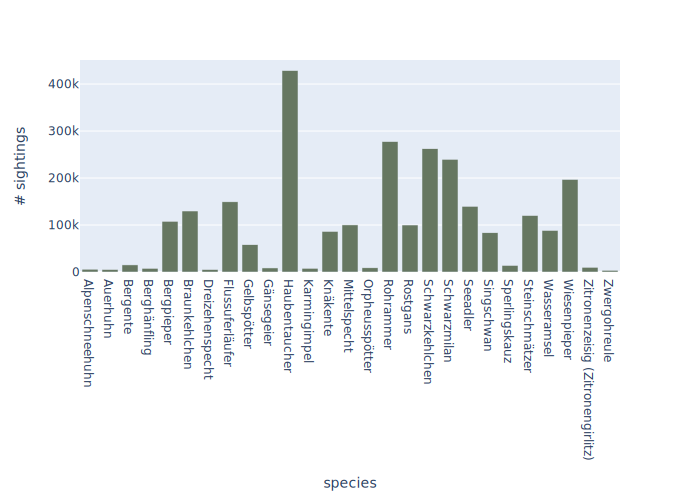

In [8]:
n_per_species = master_selected_species.groupby('name_species').size()
fig = px.bar(n_per_species)
fig.update_layout(showlegend=False, xaxis_title='species', yaxis_title='# sightings')
fig.update_traces(marker=dict(color='#667761'))
fig.show()